<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [90]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

Text(0, 0.5, 'sq__ft \n')

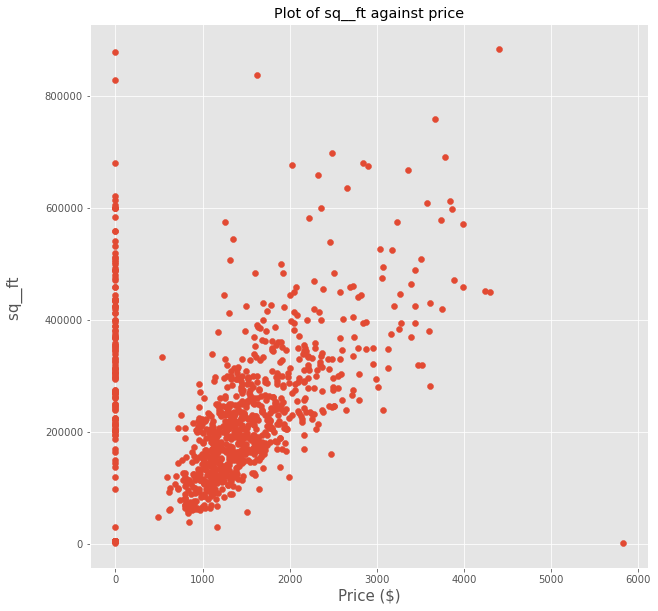

In [94]:
# Read CSV
df = pd.read_csv("Sacramento_transactions.csv")
df.head()
plt.figure(figsize=(10,10))
plt.scatter(df.sq__ft,df.price)
plt.title("Plot of sq__ft against price")
plt.xlabel("Price ($)",fontsize=15)
plt.ylabel("sq__ft \n",fontsize=15)

In [79]:
index_list = df[df.sq__ft==0].index
len(index_list)
dropped_df = df.drop(index_list)
df.loc[index_list]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539
966,9197 CORTINA CIR,ROSEVILLE,95678,CA,3,2,0,Condo,Thu May 15 00:00:00 EDT 2008,220000,38.793152,-121.290025
970,3557 SODA WAY,SACRAMENTO,95834,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,224000,38.631026,-121.501879


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

# ANSWER
The target variable is `price`

#### 2.2 List all possible variables which might be Predictor variable.

# ANSWER
`zip`,`state`,`street`,`city`,`beds`,`baths`,`sq__ft`,`type`,`sale_date`,`latitude`,`longitude`

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [115]:
# ANSWER

df.corr(),dropped_df.corr()

(                zip      beds     baths    sq__ft     price  latitude  \
 zip        1.000000  0.125319  0.069165  0.130108 -0.093353 -0.290389   
 beds       0.125319  1.000000  0.839650  0.684041  0.342024 -0.291307   
 baths      0.069165  0.839650  1.000000  0.665690  0.416208 -0.235792   
 sq__ft     0.130108  0.684041  0.665690  1.000000  0.333897 -0.383274   
 price     -0.093353  0.342024  0.416208  0.333897  1.000000 -0.039573   
 latitude  -0.290389 -0.291307 -0.235792 -0.383274 -0.039573  1.000000   
 longitude -0.539904 -0.053993  0.016582 -0.177742  0.284485  0.387925   
 
            longitude  
 zip        -0.539904  
 beds       -0.053993  
 baths       0.016582  
 sq__ft     -0.177742  
 price       0.284485  
 latitude    0.387925  
 longitude   1.000000  ,
                 zip      beds     baths    sq__ft     price  latitude  \
 zip        1.000000 -0.072673 -0.103332 -0.101560 -0.219591 -0.134134   
 beds      -0.072673  1.000000  0.654746  0.695710  0.441988 -0.1

Number of `bathrooms` seems to be the best predictor of price.

However after dropping the $0 houses, `sq__ft` seems to be the best predictor

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

# ANSWER
`sq_ft` seems to be the easiest way to predict the price of a house.

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [88]:
# ANSWER
np.abs(residual_arr)

0      134055.616731
1      175171.273822
2      129086.957264
3      136043.080518
4      129211.173751
           ...      
980    313424.223497
981    213678.384693
982    181257.881670
983    239515.413922
984    199393.488725
Name: sq__ft, Length: 814, dtype: float64

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

# ANSWER
X is `sq_ft`
Y is `price`

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [127]:
# ANSWER
y_mean = dropped_df.price.mean()
x_mean = dropped_df.sq__ft.mean()

numer_arr = (dropped_df.price - y_mean)*(dropped_df.sq__ft - x_mean)
denom_arr = (dropped_df.sq__ft - x_mean)**2
numer = numer_arr.sum()
denom = denom_arr.sum()
b1 = numer / denom
b1

125.21648667984462

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [53]:
# ANSWER
b0 = y_mean - b1*x_mean
b0

30210.633866918943

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [55]:
# ANSWER
yhat_arr = b0 + b1 * dropped_df.sq__ft
yhat_arr

0      134891.616731
1      176338.273822
2      129882.957264
3      136895.080518
4      130008.173751
           ...      
980    315704.223497
981    215155.384693
982    182473.881670
983    241200.413922
984    200755.488725
Name: sq__ft, Length: 814, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [130]:
# ANSWER
residual_arr = dropped_df.price - yhat_arr
residual_arr.max()

605437.7917650134

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.,   6.,   8.,  79., 177., 159.,
        140.,  98.,  59.,  38.,  14.,   9.,   6.,   4.,   6.,   2.,   3.,
          2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-757221.01931697, -723154.54903992, -689088.07876287,
        -655021.60848583, -620955.13820878, -586888.66793173,
        -552822.19765468, -518755.72737763, -484689.25710058,
        -450622.78682353, -416556.31654648, -382489.84626943,
        -348423.37599238, -314356.90571533, -280290.43543828,
        -246223.96516123, -212157.49488418, -178091.02460713,
        -144024.55433008, -109958.08405303,  -75891.61377598,
         -41825.14349893,   -7758.67322188,   26307.79705517,
          60374.26733222,   94440.73760927,  128507.20788632,
         162573.67816337,  196640.14844042,  230706.61871747,
         264773.08899452,  298839.55927157,  332906.02954862,
         366972.49982567,  401038.97010272, 

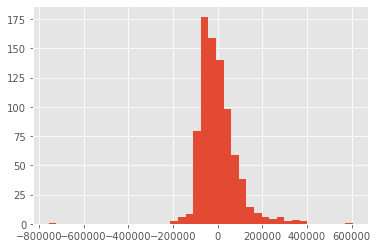

In [135]:
# ANSWER

def get_b1(y_arr,x_arr):
    y_mean = y_arr.mean()
    x_mean = x_arr.mean()
    numer_arr = (y_arr - y_mean) * (x_arr - x_mean)
    denom_arr = (x_arr - x_mean)**2
    b1 = numer_arr.sum() / denom_arr.sum()
    return b1

def get_b0(y_arr,b1,x_mean):
    b0 = y_mean - b1 * x_mean
    return b0

def get_yhat_arr(b0,b1,x_arr):
    yhat_arr = b0 + b1 * x_arr
    return yhat_arr

def calculate_r_squared(y_arr,x_arr):
    b1 = get_b1(y_arr,x_arr)
    x_mean = x_arr.mean()
    y_mean = y_arr.mean()
    b0 = get_b0(y_arr,b1,x_mean)
    yhat_arr = get_yhat_arr(b0,b1,x_arr)
    SStot_arr = (y_arr - y_mean)**2
    SStot = SStot_arr.sum()
    SSres_arr = (y_arr - yhat_arr)**2
    SSres = SSres_arr.sum()
    r_squared = 1 - (SSres/SStot)
    return r_squared

def get_residual_arr(y_arr,x_arr):
    b1 = get_b1(y_arr,x_arr)
    x_mean = x_arr.mean()
    b0 = get_b0(y_arr,b1,x_mean)
    yhat_arr = get_yhat_arr(b0,b1,x_arr)
    residual_arr = y_arr - yhat_arr 
    return residual_arr


##### 2.7.F [BONUS] Draw Plot of Predicted Line

Text(0.5, 0, 'sq__ft \n')

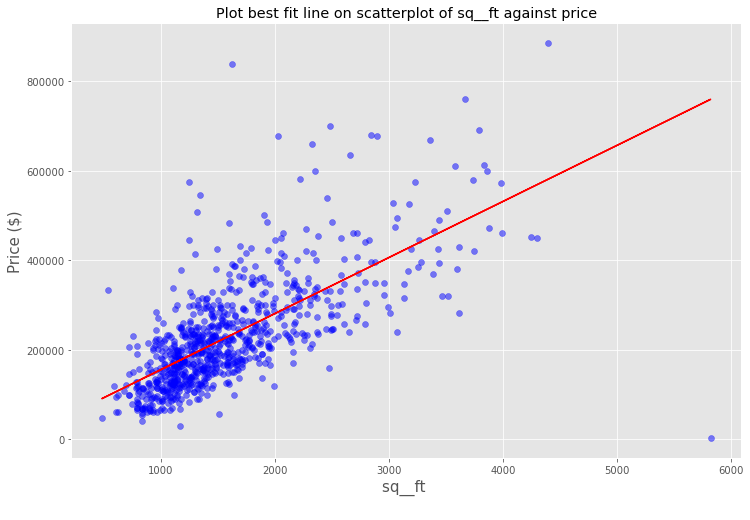

In [104]:
# ANSWER
plt.figure(figsize=(12,8))
plt.scatter(dropped_df.sq__ft,dropped_df.price,color='blue',alpha=0.5)
plt.plot(dropped_df.sq__ft,yhat_arr,color='red')
plt.title("Plot best fit line on scatterplot of sq__ft against price")
plt.ylabel("Price ($)",fontsize=15)
plt.xlabel("sq__ft \n",fontsize=15)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

Text(0.5, 0, 'sq__ft \n')

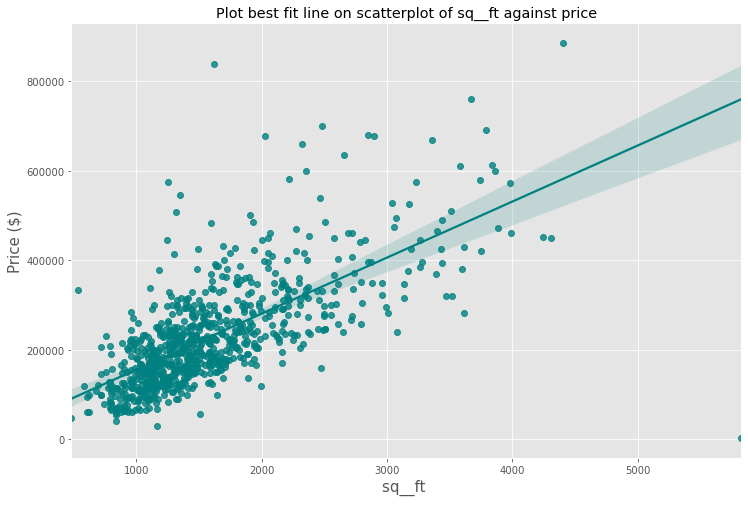

In [102]:
# ANSWER
plt.figure(figsize=(12,8))
sns.regplot(x="sq__ft",y="price",data=dropped_df,color='teal')
plt.title("Plot best fit line on scatterplot of sq__ft against price")
plt.ylabel("Price ($)",fontsize=15)
plt.xlabel("sq__ft \n",fontsize=15)

Text(0.5, 0, 'sq__ft \n')

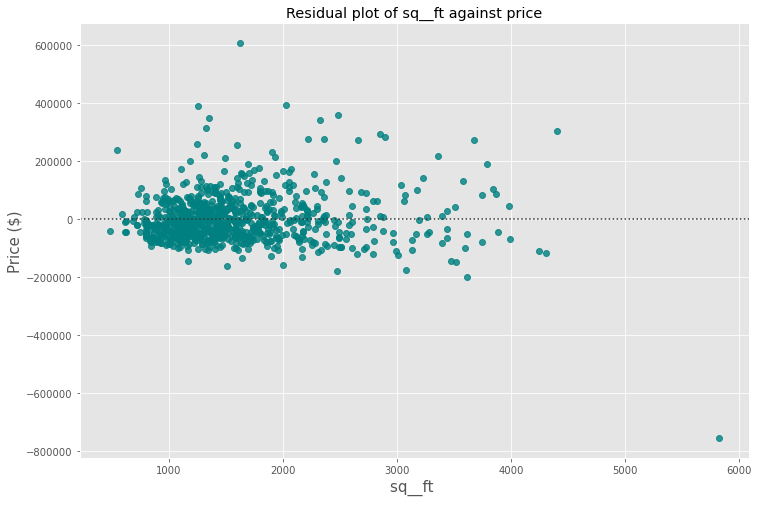

In [106]:
plt.figure(figsize=(12,8))
sns.residplot(x="sq__ft",y="price",data=dropped_df,color='teal')
plt.title("Residual plot of sq__ft against price")
plt.ylabel("Price ($)",fontsize=15)
plt.xlabel("sq__ft \n",fontsize=15)

Text(0.5, 1.0, 'Regression plot after dropping outlier')

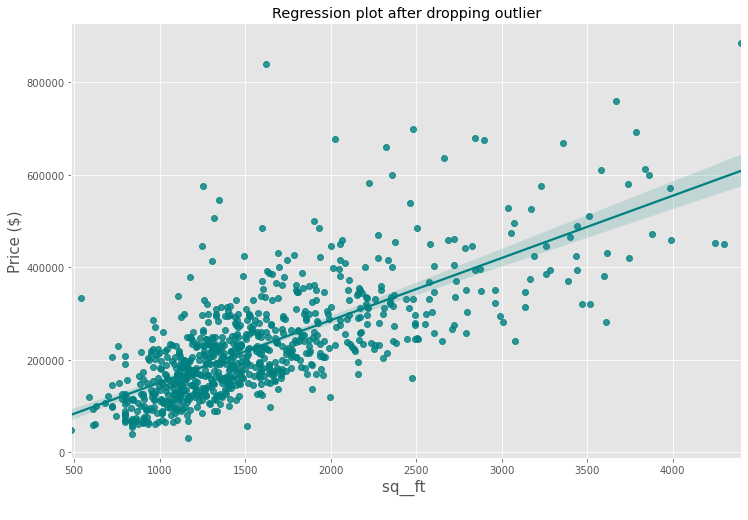

In [112]:
dropped_df[dropped_df.sq__ft > 5000]
plt.figure(figsize=(12,8))
drop_outlier = dropped_df.drop(866)
sns.regplot(x="sq__ft",y="price",data=drop_outlier,color='teal')
plt.ylabel("Price ($)",fontsize=15)
plt.xlabel("sq__ft \n",fontsize=15)
plt.title("Regression plot after dropping outlier")

Text(0.5, 0, 'sq__ft \n')

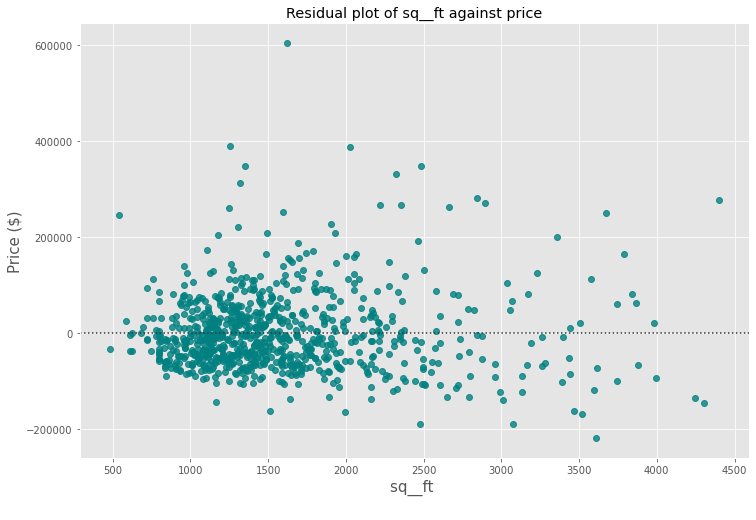

In [113]:
plt.figure(figsize=(12,8))
sns.residplot(x="sq__ft",y="price",data=drop_outlier,color='teal')
plt.title("Residual plot of sq__ft against price")
plt.ylabel("Price ($)",fontsize=15)
plt.xlabel("sq__ft \n",fontsize=15)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   4.,
          5.,  19.,  66., 133., 134., 130., 104.,  73.,  45.,  39.,  20.,
         11.,   5.,   6.,   2.,   6.,   3.,   1.,   3.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-757221.01931697, -729967.84309533, -702714.66687369,
        -675461.49065206, -648208.31443042, -620955.13820878,
        -593701.96198714, -566448.7857655 , -539195.60954386,
        -511942.43332222, -484689.25710058, -457436.08087894,
        -430182.9046573 , -402929.72843566, -375676.55221402,
        -348423.37599238, -321170.19977074, -293917.0235491 ,
        -266663.84732746, -239410.67110582, -212157.49488418,
        -184904.31866254, -157651.1424409 , -130397.96621926,
        -103144.78999762,  -75891.61377598,  -48638.43755434,
         -21385.2613327 ,    5867.91488894,   33121.09111058,
          60374.26733222,   87627.4435

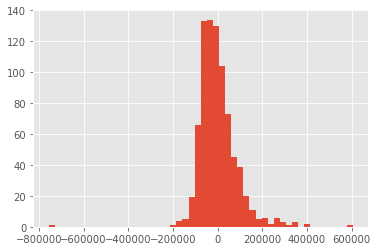

In [137]:
residual_arr = get_residual_arr(dropped_df.price,dropped_df.sq__ft)
plt.hist(residual_arr,bins=50)

In [126]:
calculate_r_squared(drop_outlier.price,drop_outlier.sq__ft)

0.5309136301743176

R Squared value improved after dropping outlier.

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [128]:
# ANSWER
price = b0 + b1 * 1204
price

180971.28382945186



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



